In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Методы численного интегрирования

## Задание 1

Рассмотрим интеграл $$I=\int_{-1}^5\frac{dx}{1+9x^2}.$$

### 1. Вычислите значение интеграла аналитически.

$$I=\int_{-1}^5\frac{dx}{1+9x^2}=\frac{1}{9}\int_{-1}^5\frac{dx}{1/9+x^2}=\frac{1}{3}\operatorname{arctg} 3x\big|_{-1}^5=0.917758$$

In [ ]:
I_exact = (1/3) * (np.arctan(15) + np.arctan(3))
print("Аналитическое значение интеграла: {:.6f}".format(I_exact))

Аналитическое значение интеграла: 0.917758


### 2. Реализуйте методы численного интегрирования по формулам трапеций и Симпсона, или используйте готовые реализации из scipy.
Вычислите по этим формулам интеграл $I$ и оцените погрешности для разного числа интервалов. Определите скорость убывания погрешностей, сравните их с теоретическими значениями. Изобразите результаты сравнения на графике.

In [ ]:
from scipy.integrate import simpson, trapezoid

def f(x):
    return 1 / (1 + 9 * x**2)

In [ ]:
a, b = -1, 5

N_values = []  # число интервалов
error_trap = []
error_simp = []

for N in range(4, 300, 4):
    N_values.append(N)
    x = np.linspace(a, b, N+1)  # N+1 точка => N интервалов
    y = f(x)

    I_trap = trapezoid(y, x)
    error_trap.append(abs(I_exact - I_trap))

    I_simp = simpson(y, x=x)
    error_simp.append(abs(I_exact - I_simp))

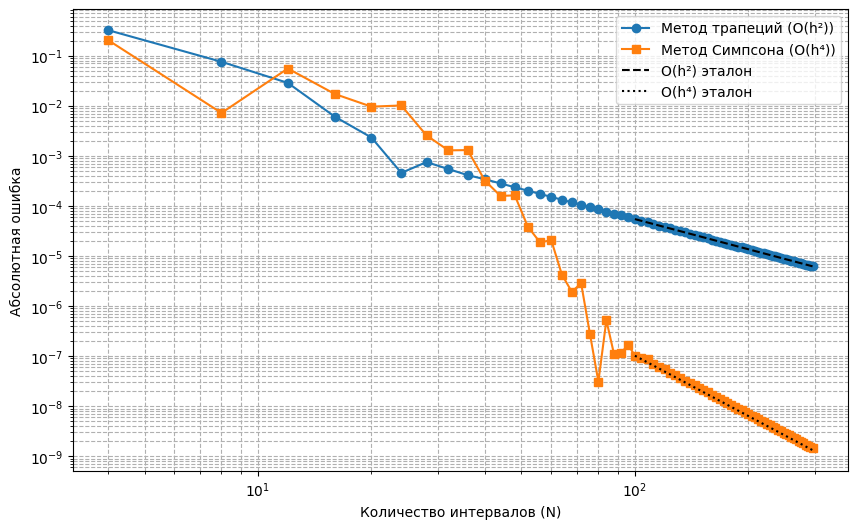

In [ ]:
plt.figure(figsize=(10,6))
plt.loglog(N_values, error_trap, 'o-', label="Метод трапеций (О(h²))")
plt.loglog(N_values, error_simp, 's-', label="Метод Симпсона (О(h⁴))")
plt.xlabel("Количество интервалов (N)")
plt.ylabel("Абсолютная ошибка")
plt.grid(True, which="both", ls="--")

N_fit_start = 100
N_fit = np.array([N_fit_start, N_values[-1]], dtype=float)

index_N100 = int(N_fit_start/4)-1
k_trap = error_trap[index_N100] / (N_fit_start**(-2))
k_simp = error_simp[index_N100] / (N_fit_start**(-4))

plt.loglog(N_fit, k_trap * (N_fit**(-2)), 'k--', label="О(h²) эталон")
plt.loglog(N_fit, k_simp * (N_fit**(-4)), 'k:', label="О(h⁴) эталон")

plt.legend()
plt.show()

### 3. Воспользуйтесь правилом Рунге для оценке длины шага по методу трапеций, необходимого для получения $I$ с абсолютной погрешностью менее $10^{-6}$. Сравните полученную оценку длины шага с фактической длиной шага, необходимой для достижения указанной точности.

In [ ]:
h = 0.5 # начальный шаг (грубое приближение)
tolerance = 1e-6

found = False
iteration = 0

while not found:
    iteration += 1
    N = int(np.ceil((b - a) / h))
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    I_h = trapezoid(f(x), x)

    N2 = 2 * N
    x2 = np.linspace(a, b, N2+1)
    I_h2 = trapezoid(f(x2), x2)

    # Правило Рунге для метода трапеций (порядок сходимости p=2):
    # E_R \approx |I_h2 - I_h| / (2^2 - 1) = |I_h2 - I_h| / 3
    err = abs(I_h2 - I_h) / 3

    print("Итерация {:3d}: h = {:.8f}, I_h = {:.8f}, I_h2 = {:.8f}, оценка погр. = {:.8e}".format(iteration, h, I_h, I_h2, err))

    if err < tolerance:
        found = True
        break
    else:
        h = h / 2

if found:
    print("\nТребуемая точность достигнута при шаге h = {:.8f}".format(h))
else:
    print("Не удалось достичь требуемой точности.")

# Для проверки, сравним с аналитическим значением
abs_error = abs(I_h2 - I_exact)
print("Абсолютная погрешность (I_h2 относительно I_exact): {:.8e}".format(abs_error))

Итерация   1: h = 0.50000000, I_h = 0.94634378, I_h2 = 0.91730128, оценка погр. = 9.68083467e-03
Итерация   2: h = 0.25000000, I_h = 0.91730128, I_h2 = 0.91752194, оценка погр. = 7.35547154e-05
Итерация   3: h = 0.12500000, I_h = 0.91752194, I_h2 = 0.91769884, оценка погр. = 5.89666603e-05
Итерация   4: h = 0.06250000, I_h = 0.91769884, I_h2 = 0.91774319, оценка погр. = 1.47815483e-05
Итерация   5: h = 0.03125000, I_h = 0.91774319, I_h2 = 0.91775428, оценка погр. = 3.69731519e-06
Итерация   6: h = 0.01562500, I_h = 0.91775428, I_h2 = 0.91775705, оценка погр. = 9.24449496e-07

Требуемая точность достигнута при шаге h = 0.01562500
Абсолютная погрешность (I_h2 относительно I_exact): 9.24481695e-07


In [ ]:
6/0.01562500

384.0

При N = 740, h = 0.008108108108108109, ошибка становится ниже 1e-6 (ошибка = 9.96e-07).


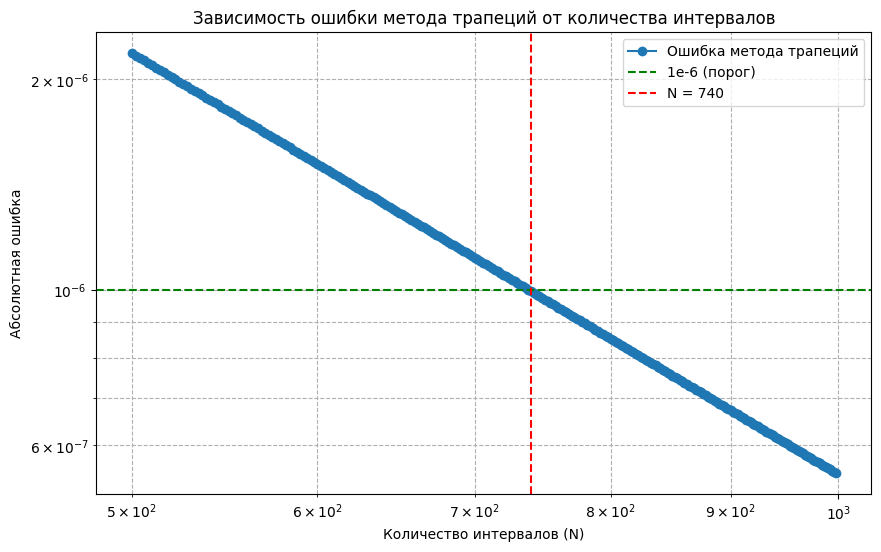

In [ ]:
N_values = []
error_trap = []

for N in range(500, 1000, 2):
    N_values.append(N)
    x = np.linspace(a, b, N+1)
    I_val = trapezoid(f(x), x)
    error_trap.append(abs(I_exact - I_val))

N_values = np.array(N_values)
error_trap = np.array(error_trap)

plt.figure(figsize=(10,6))
plt.loglog(N_values, error_trap, 'o-', label="Ошибка метода трапеций")
plt.xlabel("Количество интервалов (N)")
plt.ylabel("Абсолютная ошибка")
plt.title("Зависимость ошибки метода трапеций от количества интервалов")
plt.grid(True, which="both", ls="--")

plt.axhline(y=1e-6, color='green', linestyle='--', label='1e-6 (порог)')

indices = np.where(error_trap < 1e-6)[0]
if len(indices) > 0:
    index_N = indices[0]
    N_threshold = N_values[index_N]
    plt.axvline(x=N_threshold, color='red', linestyle='--', label=f'N = {N_threshold}')
    print(f"При N = {N_threshold}, h = {(b-a)/N_threshold}, ошибка становится ниже 1e-6 (ошибка = {error_trap[index_N]:.2e}).")
else:
    print("Не найдено значение N, при котором ошибка меньше 1e-6.")

plt.legend()
plt.show()

Фактическая длина шага оказалась в два раза меньше оценки.

### 4. (не обязательное) Повторите оценку шага по правилу Рунге для формулы Симпсона.

### 5. Для интервала $[-1,1]$ напишите программу, вычисляющую веса формул Ньютона-Котеса с равноотстоящими узлами. Проверьте выполнение свойств весов: нормировки и симметричности. Для какого числа узлов впервые появляются отрицательные веса?

In [ ]:
def generate_nodes(N):
    return np.linspace(-1, 1, N)

def newton_cotes(xk, a=-1, b=1):
    xk = np.asarray(xk)
    n = len(xk)
    N = np.arange(n)
    W = xk ** N[:, None]
    L = np.linalg.inv(W)
    integrals = (b**(N+1) - a**(N+1)) / (N + 1)
    return L @ integrals

negative_found = False
N = 2

while not negative_found:
    nodes = generate_nodes(N)
    weights = newton_cotes(nodes, -1, 1)
    if np.any(weights < 0):
        print(f"Отрицательные веса впервые появляются при N = {N}")
        negative_found = True
    N += 1

for n in [8]:
    nodes = generate_nodes(n)
    weights = newton_cotes(nodes, -1, 1)
    print(f"N = {n}: Веса = {weights}")
    print(f"Сумма весов: {np.sum(weights):.2f} (ожидается 2.00)")
    symmetric = np.allclose(weights, weights[::-1])
    print(f"Симметричность: {symmetric}\n")

Отрицательные веса впервые появляются при N = 9
N = 8: Веса = [0.0869213  0.41400463 0.153125   0.34594907 0.34594907 0.153125
 0.41400463 0.0869213 ]
Сумма весов: 2.00 (ожидается 2.00)
Симметричность: True



## Задание 2.

Рассмотрим интеграл
$$I=\int_{-1}^5\frac{dx}{1+9x^2}.$$

### 1. Напишите программу, вычисляющую корни полиномов Лежандра (вам могут пригодиться функции `scipy.special.eval_legendre` и `scipy.optimize.root_scalar`).
Найдите веса соответствующей формулы Гаусса.
Сравните ваш результат с возвращаемым значением функции `scipy.special.roots_legendre`.

In [ ]:
from scipy.special import roots_legendre
from scipy.special import eval_legendre
from scipy.optimize import root_scalar

def eval_roots(n, N=100000):
  def leg(x,n=n):
    return eval_legendre(n, x)
  if N%2==0:
    N=N+1
  h=2/N
  Y=[]
  X_leg=[a+i*h for i in range(N+1)]
  for j in range(N+1):
    Y.append(leg(X_leg[j]))
  roots=[]
  for i in range(N):
    if Y[i]*Y[i+1] < 0:
      roots.append(root_scalar(leg, bracket=[X_leg[i],X_leg[i+1]], method='brentq').root)
  return roots

def eval_weights(roots, n):
  def leg(x,n=n):
    return eval_legendre(n, x)
  deriv_int=10e-8
  weights=[]
  for i in roots:
    deriv_leg=(leg(i+deriv_int)-leg(i-deriv_int))/(2*deriv_int)
    weights.append(2/((1-i**2)*((deriv_leg)**2)))
  return weights
n=20
roots=eval_roots(n)
print('Корни полинома Лежандра (через root_scalar): ',roots)

print("Результат, возвращаемый значением функции `scipy.special.roots_legendre`:")
print("Корни:", roots_legendre(n)[0])

weights=eval_weights(roots,n)

print("Веса (своя реализация):", weights)

print("Веса:", roots_legendre(n)[1])

Корни полинома Лежандра (через root_scalar):  [-0.9931285991851008, -0.9639719272777613, -0.9122344282513092, -0.8391169718222161, -0.7463319064601508, -0.6360536807265138, -0.510867001950827, -0.3737060887154195, -0.22778585114164507, -0.07652652113349726, 0.07652652113349738, 0.227785851141645, 0.37370608871541955, 0.5108670019508271, 0.6360536807265139, 0.7463319064601508, 0.8391169718222162, 0.9122344282513093, 0.9639719272777612, 0.9931285991851009]
Результат, возвращаемый значением функции `scipy.special.roots_legendre`:
Корни: [-0.9931286  -0.96397193 -0.91223443 -0.83911697 -0.74633191 -0.63605368
 -0.510867   -0.37370609 -0.22778585 -0.07652652  0.07652652  0.22778585
  0.37370609  0.510867    0.63605368  0.74633191  0.83911697  0.91223443
  0.96397193  0.9931286 ]
Веса (своя реализация): [0.01761400715121278, 0.04060142982643742, 0.06267204840061236, 0.08327674165140542, 0.10193011967652557, 0.11819453226639622, 0.13168863834772476, 0.14209610919686724, 0.14917298623996766, 0

### 2. Напишите программу, вычисляющую $I$ с помощью полученной квадратурной формулы. Постройте график погрешности в зависимости от числа узлов.
Определите скорость убывания погрешности.

In [ ]:
points = roots
weigths = weights

def func(x):
    return 1/(1+9*x**2)

analytical=1/3*(np.arctan(3) + np.arctan(15))


def integrateGauss(f, points, weigths,a,b):
  def x(u,a=a,b=b):
     return (a+b+(b-a)*u)/2
  S = 0
  for i in range(len(points)):
    S += f(x(points[i]))*weigths[i]
  return S*(b-a)/2

print(integrateGauss(func, points, weigths, a=-1,b=5))
print(abs(integrateGauss(func, points, weigths, a=-1,b=5)-analytical)/analytical)


0.9192604534305364
0.0016371145697854535


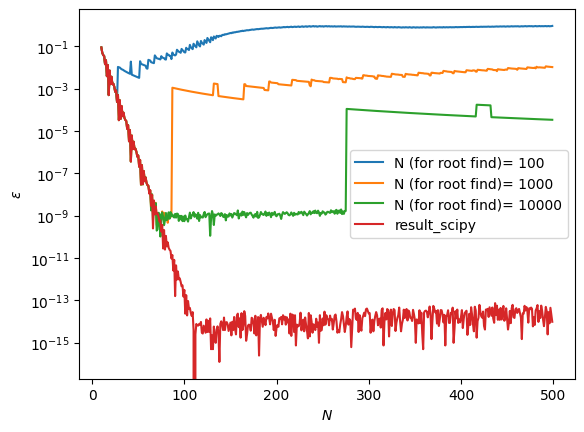

In [ ]:
N = range(10,500)
N_root_points=[100, 1000, 10000]
result_scipy=[]
for N_root in N_root_points:
    result = []
    for i in N:
        roots=eval_roots(i,N=N_root)
        weights=eval_weights(roots,i)
        result.append(np.abs(integrateGauss(func,roots,weights,a=-1,b=5) - analytical)/analytical)

    plt.semilogy(N, result, label=f'N (for root find)= {N_root}')
for n in N:
    roots=roots_legendre(n)[0]
    weights=roots_legendre(n)[1]
    result_scipy.append(np.abs(integrateGauss(func,roots,weights,a=-1,b=5) - analytical)/analytical)

plt.semilogy(N, result_scipy, label="result_scipy")
plt.xlabel("$N$")
plt.ylabel("$\\varepsilon$")
plt.legend()
plt.show()

##  Задание 3.

Рассмотрим интеграл $$I=\int_0^\infty e^{-x}\cos\omega x\,dx.$$
Требуется вычислить интеграл с относительной точностью $10^{-3}$
для $\omega=100,200,500$.

### 1. Найдите конечный интервал интегрирования, достаточный для вычисления $I$ с заданной точностью.

In [ ]:
def compute_T(omega):
    return np.log(1000 * (1 + omega**2))

omegas = [100, 200, 500]
Ts = {omega: compute_T(omega) for omega in omegas}

print("Конечные интервалы интегрирования T:")
for omega in omegas:
    print(f"ω = {omega}: T ≈ {Ts[omega]:.3f}")

Конечные интервалы интегрирования T:
ω = 100: T ≈ 16.118
ω = 200: T ≈ 17.504
ω = 500: T ≈ 19.337


### 2. Примение для вычисления $I$ составную формулу Филона (аналог трапеций).
Найдите необходимое для вычисления $I$ с заданной точностью число вычислений подинтегрального выражения.

Хотим разбить интервал интегрирования на подынтервалы так, чтобы одна осцилляция содержала их много. На подынтервалах квадратично аппроксимируем.

В нашем случае метод Филона применяется для вычисления интеграла:
$$I=\int_0^Te^{−x}\cos⁡(\omega x) dx,$$

где $T$ — конечный интервал, выбранный так, чтобы остаток интеграла был меньше $10^{−6}$. Метод Филона позволяет эффективно вычислить этот интеграл даже для больших значений $\omega$.

In [ ]:
import numpy as np

def exact_integral(omega):
    return 1 / (1 + omega**2)

def compute_T(omega):
    return np.log(1e6 * (1 + omega**2))

def filon_integrate(omega, T, N):
    h = T / N
    x = np.linspace(0, T, N + 1)
    f_values = np.exp(-x)

    total = 0.0
    for k in range(N):
        x_k = k * h
        x_k1 = x_k + h

        f_k = f_values[k]
        f_k1 = f_values[k + 1]

        theta = omega * h
        if theta == 0:
            alpha = beta = gamma = 0.0
        else:
            alpha = (np.sin(theta) - theta * np.cos(theta)) / theta**2
            beta = 2 * (theta * np.sin(theta) + np.cos(theta) - 1) / theta**2
            gamma = 4 * (np.sin(theta) - theta * np.cos(theta)) / theta**2

        term = h * (
            alpha * f_k * np.cos(omega * x_k) +
            beta * (f_k + f_k1) / 2 * np.cos(omega * (x_k + h/2)) +
            gamma * f_k1 * np.cos(omega * x_k1)
        )
        total += term
    return total

omegas = range(100,505,100)#[100, 200, 500]
results = {}

for omega in omegas:
    T = compute_T(omega)
    exact_val = exact_integral(omega)
    N = 10
    rel_error = 1.0

    while rel_error > 1e-3 and N <= 1e6:
        N *= 2
        approx = filon_integrate(omega, T, N)
        rel_error = np.abs(approx - exact_val) / exact_val

    results[omega] = {
        'T': T,
        'N': N,
        'evals': N + 1,
        'error': rel_error
    }

print("Результаты для ω = 100, 200, 500:")
for omega in omegas:
    res = results[omega]
    print(f"ω = {omega}:")
    print(f"  T = {res['T']:.2f}")
    print(f"  Число подынтервалов N = {res['N']}")
    print(f"  Вычислений функции: {res['evals']}")
    print(f"  Относительная ошибка: {res['error']:.2e}\n")

Результаты для ω = 100, 200, 500:
ω = 100:
  T = 23.03
  Число подынтервалов N = 1310720
  Вычислений функции: 1310721
  Относительная ошибка: 2.77e-03

ω = 200:
  T = 24.41
  Число подынтервалов N = 1310720
  Вычислений функции: 1310721
  Относительная ошибка: 4.82e-03

ω = 300:
  T = 25.22
  Число подынтервалов N = 655360
  Вычислений функции: 655361
  Относительная ошибка: 7.92e-04

ω = 400:
  T = 25.80
  Число подынтервалов N = 1310720
  Вычислений функции: 1310721
  Относительная ошибка: 7.07e-04

ω = 500:
  T = 26.24
  Число подынтервалов N = 1310720
  Вычислений функции: 1310721
  Относительная ошибка: 8.40e-03



Text(0, 0.5, 'Относительная ошибка')

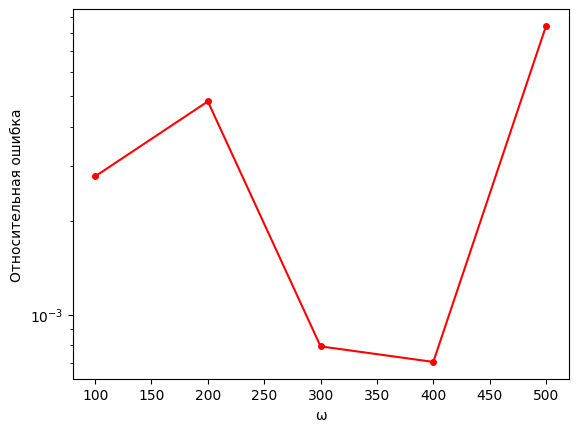

In [ ]:
plt.semilogy(omegas, [results[omega]['error'] for omega in omegas], 'ro-', markersize=4)
plt.xlabel('ω')
plt.ylabel('Относительная ошибка')

### 3. (не обязательно) Найдите $I$ с заданной точностью с помощью формулы Гаусса. Сравните необходимое для этого число вычислений подинтегрального выражения с вычислениями по формуле Филона.

## Задание 4.

Формула билинейной интерполяции:
$$p(x_0+ph,y_0+qk)
=(1-p)(1-q)f_{0,0}+p(1-q)f_{1,0}+(1-p)q f_{0,1}+pq f_{1,1}.$$

### 1. Используйте формулу билинейной интерполяции для интерполяции функции $f(x,y)=\cos(x+xy)$ на квадрате $[0,\pi]\times[0,\pi]$.
Разделите каждую сторону квадрата на $N$ равных частей, и найдите зависимость погрешности билинейной интерполяции от $N$.

In [ ]:
def f(x, y):
    return np.cos(x + x * y)

def bilinear_interpolation(x, y, x0, y0, h, k, f00, f10, f01, f11):
    p = (x - x0) / h
    q = (y - y0) / k
    return (1 - p) * (1 - q) * f00 + p * (1 - q) * f10 + (1 - p) * q * f01 + p * q * f11

def compute_interpolation_error(N):
    h = np.pi / N
    k = np.pi / N
    x_nodes = np.linspace(0, np.pi, N + 1)
    y_nodes = np.linspace(0, np.pi, N + 1)

    f_values = np.array([[f(x, y) for y in y_nodes] for x in x_nodes])
    x_test = np.linspace(0, np.pi, 100)
    y_test = np.linspace(0, np.pi, 100)
    X_test, Y_test = np.meshgrid(x_test, y_test)

    error = 0.0
    for i in range(len(x_test)):
        for j in range(len(y_test)):
            x = x_test[i]
            y = y_test[j]

            ix = int(x // h)-1
            iy = int(y // k)-1
            x0 = ix * h
            y0 = iy * k

            f00 = f_values[ix, iy]
            f10 = f_values[ix + 1, iy]
            f01 = f_values[ix, iy + 1]
            f11 = f_values[ix + 1, iy + 1]

            p_interp = bilinear_interpolation(x, y, x0, y0, h, k, f00, f10, f01, f11)
            p_exact = f(x, y)
            error += np.abs(p_interp - p_exact)
    error /= (len(x_test) * len(y_test))
    return error

N_values = [10, 20, 40, 80, 160]
errors = [compute_interpolation_error(N) for N in N_values]

print("Зависимость погрешности от N:")
for N, error in zip(N_values, errors):
    print(f"N = {N}: Погрешность = {error:.6f}")

Зависимость погрешности от N:
N = 10: Погрешность = 0.347544
N = 20: Погрешность = 0.105386
N = 40: Погрешность = 0.039121
N = 80: Погрешность = 0.018907
N = 160: Погрешность = 0.001081


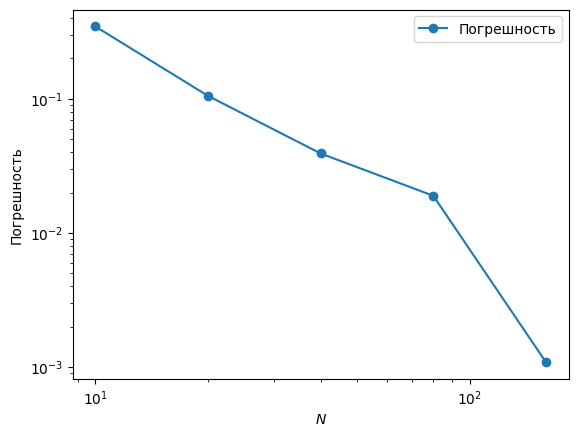

In [ ]:
plt.loglog(N_values, errors, marker='o', label="Погрешность")
plt.xlabel("$N$")
plt.ylabel("Погрешность")
plt.legend()
plt.show()

### 2. Повторите пункт 1, выбирая $N$ точек случайно. Сравните оценки погрешностей.

In [ ]:
from random import random

def compute_interpolation_error_random(N):
    h = np.pi / N
    k = np.pi / N
    x_nodes = np.linspace(0, np.pi, N + 1)
    y_nodes = np.linspace(0, np.pi, N + 1)

    f_values = np.array([[f(x, y) for y in y_nodes] for x in x_nodes])
    x_test = np.linspace(0, np.pi, 100)
    y_test = np.linspace(0, np.pi, 100)
    X_test, Y_test = np.meshgrid(x_test, y_test)

    error = 0.0
    for i in range(len(x_test)):
        for j in range(len(y_test)):
            x = x_test[i]+h*(random()-0.5)
            y = y_test[j]+k*(random()-0.5)

            ix = int(x // h)-1
            iy = int(y // k)-1
            x0 = ix * h
            y0 = iy * k

            f00 = f_values[ix, iy]
            f10 = f_values[ix + 1, iy]
            f01 = f_values[ix, iy + 1]
            f11 = f_values[ix + 1, iy + 1]

            p_interp = bilinear_interpolation(x, y, x0, y0, h, k, f00, f10, f01, f11)
            p_exact = f(x, y)
            error += np.abs(p_interp - p_exact)
    error /= (len(x_test) * len(y_test))
    return error

N_values = [10, 20, 40, 80, 160]
errors = [compute_interpolation_error_random(N) for N in N_values]

print("Зависимость погрешности от N:")
for N, error in zip(N_values, errors):
    print(f"N = {N}: Погрешность = {error:.6f}")

Зависимость погрешности от N:
N = 10: Погрешность = 0.389479
N = 20: Погрешность = 0.129088
N = 40: Погрешность = 0.051586
N = 80: Погрешность = 0.026197
N = 160: Погрешность = 0.011622


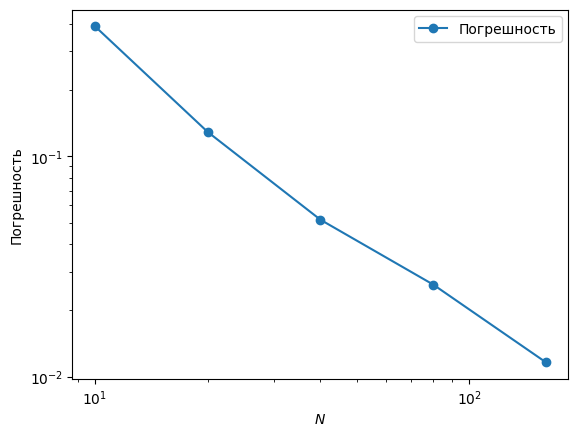

In [ ]:
plt.loglog(N_values, errors, marker='o', label="Погрешность")
plt.xlabel("$N$")
plt.ylabel("Погрешность")
plt.legend()
plt.show()

In [ ]:
def compute_interpolation_error_completely_random(N, num_samples=1000):
    h = np.pi / N
    k = np.pi / N
    x_nodes = np.linspace(0, np.pi, N + 1)
    y_nodes = np.linspace(0, np.pi, N + 1)
    f_values = np.array([[f(x, y) for y in y_nodes] for x in x_nodes])

    x_test = np.random.uniform(0, np.pi, num_samples)
    y_test = np.random.uniform(0, np.pi, num_samples)

    error = 0.0
    for i in range(num_samples):
        x = x_test[i]
        y = y_test[i]

        ix = int(x // h)-1
        iy = int(y // k)-1
        x0 = ix * h
        y0 = iy * k

        f00 = f_values[ix, iy]
        f10 = f_values[ix + 1, iy]
        f01 = f_values[ix, iy + 1]
        f11 = f_values[ix + 1, iy + 1]

        p_interp = bilinear_interpolation(x, y, x0, y0, h, k, f00, f10, f01, f11)
        p_exact = f(x, y)
        error += np.abs(p_interp - p_exact)
    error /= num_samples
    return error

N_values = [10, 20, 40, 80, 160]
errors_random = [compute_interpolation_error_completely_random(N) for N in N_values]

print("Зависимость погрешности от N на случайных точках:")
for N, error in zip(N_values, errors_random):
    print(f"N = {N}: Погрешность = {error:.6f}")

Зависимость погрешности от N на случайных точках:
N = 10: Погрешность = 0.363152
N = 20: Погрешность = 0.118549
N = 40: Погрешность = 0.037241
N = 80: Погрешность = 0.013226
N = 160: Погрешность = 0.005596


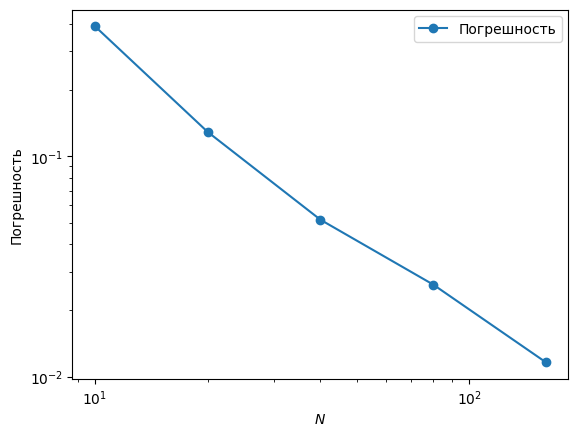

In [ ]:
plt.loglog(N_values, errors, marker='o', label="Погрешность")
plt.xlabel("$N$")
plt.ylabel("Погрешность")
plt.legend()
plt.show()

## Задание 5.

### 1. Найдите численно объем шара с радиусом $1$ в пространстве $\mathbb R^4$.
Для этого поместите шар в гиперкуб $[-1,1]^{\times 4}$ и вычислите интеграл от функции
$$
\chi(x)=\begin{cases}
1,& |x|\leq 1,\\
0,& |x|>1.
\end{cases}
$$
Найдите интеграл численно, используя произведение составных формул трапеций по каждой из координат. Постройте график зависимости погрешности от общего числа точек.

N=2, Точек=81, Погрешность=0.06520
N=3, Точек=256, Погрешность=1.77431
N=4, Точек=625, Погрешность=0.37770
N=5, Точек=1296, Погрешность=0.42920
N=6, Точек=2401, Погрешность=0.06520
N=7, Точек=4096, Погрешность=0.24342
N=8, Точек=6561, Погрешность=0.05348
N=9, Точек=10000, Погрешность=0.25259
N=10, Точек=14641, Погрешность=0.19720
N=11, Точек=20736, Погрешность=0.09142
N=12, Точек=28561, Погрешность=0.11227
N=13, Точек=38416, Погрешность=0.08567
N=14, Точек=50625, Погрешность=0.02310
N=15, Точек=65536, Погрешность=0.04994
N=16, Точек=83521, Погрешность=0.00780
N=17, Точек=104976, Погрешность=0.05517
N=18, Точек=130321, Погрешность=0.03167
N=19, Точек=160000, Погрешность=0.04546
N=20, Точек=194481, Погрешность=0.01000


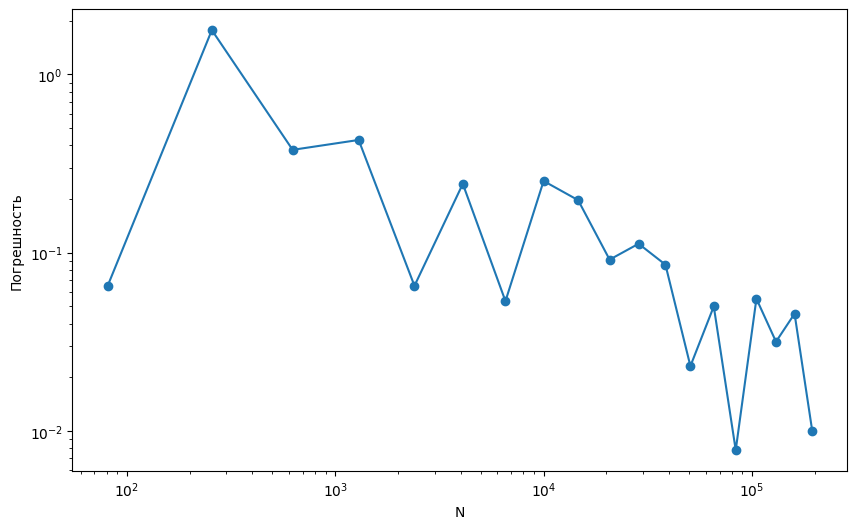

In [ ]:
exact_volume = (np.pi**2) / 2

def compute_integral(M):
    h = 2 / M
    x = np.linspace(-1, 1, M + 1)
    w = np.full(M + 1, h)
    w[0] = w[-1] = h / 2

    X, Y, Z, T = np.meshgrid(x, x, x, x, indexing='ij')

    R_sq = X**2 + Y**2 + Z**2 + T**2
    chi = (R_sq <= 1).astype(float)

    W = np.outer(w, np.outer(w, np.outer(w, w))).reshape(chi.shape)

    integral = np.sum(W * chi)
    return integral

Ns = np.arange(2, 21)
errors = []
total_points = []

for N in Ns:
    integral = compute_integral(N)
    error = abs(integral - exact_volume)
    errors.append(error)
    total_points.append((N + 1)**4)
    print(f"N={N}, Точек={(N+1)**4}, Погрешность={error:.5f}")

plt.figure(figsize=(10, 6))
plt.loglog(total_points, errors, 'o-')
plt.xlabel('N')
plt.ylabel('Погрешность')
plt.show()

## Задание 6.

Рассмотрим интеграл $I$ от функции
$$
f(x)=\cos\left(\sum_{n=1}^4 n\cdot x_n^2\right)
$$
по гиперкубу $[0,1]^{\times 4}$.

### 1. Найдите интеграл $I$ численно через произведение составных формул трапеций по каждой из координат.

In [ ]:
import sympy as sp

x1, x2, x3, x4 = sp.symbols('x1 x2 x3 x4')
f = sp.cos(x1**2 + 2*x2**2 + 3*x3**2 + 4*x4**2)
I = sp.integrate(f, (x1, 0, 1), (x2, 0, 1), (x3, 0, 1), (x4, 0, 1))
I

sqrt(2)*sqrt(pi)*(sqrt(pi)*(-sqrt(6)*sqrt(pi)*(sqrt(2)*sqrt(pi)*fresnelc(2*sqrt(2)/sqrt(pi))*fresnels(sqrt(6)/sqrt(pi))/4 + sqrt(2)*sqrt(pi)*fresnelc(sqrt(6)/sqrt(pi))*fresnels(2*sqrt(2)/sqrt(pi))/4)*fresnels(2/sqrt(pi))/6 + sqrt(6)*sqrt(pi)*(-sqrt(2)*sqrt(pi)*fresnels(2*sqrt(2)/sqrt(pi))*fresnels(sqrt(6)/sqrt(pi))/4 + sqrt(2)*sqrt(pi)*fresnelc(2*sqrt(2)/sqrt(pi))*fresnelc(sqrt(6)/sqrt(pi))/4)*fresnelc(2/sqrt(pi))/6)*fresnelc(sqrt(2)/sqrt(pi))/2 - sqrt(pi)*(sqrt(6)*sqrt(pi)*(-sqrt(2)*sqrt(pi)*fresnels(2*sqrt(2)/sqrt(pi))*fresnels(sqrt(6)/sqrt(pi))/4 + sqrt(2)*sqrt(pi)*fresnelc(2*sqrt(2)/sqrt(pi))*fresnelc(sqrt(6)/sqrt(pi))/4)*fresnels(2/sqrt(pi))/6 + sqrt(6)*sqrt(pi)*(sqrt(2)*sqrt(pi)*fresnelc(2*sqrt(2)/sqrt(pi))*fresnels(sqrt(6)/sqrt(pi))/4 + sqrt(2)*sqrt(pi)*fresnelc(sqrt(6)/sqrt(pi))*fresnels(2*sqrt(2)/sqrt(pi))/4)*fresnelc(2/sqrt(pi))/6)*fresnels(sqrt(2)/sqrt(pi))/2)/2

In [ ]:
Ifunc = I.evalf()
Ifunc

-0.236756366335447

### 2. Найдите интеграл $I$ численно через произведение составных формул Симпсона по каждой из координат.

In [ ]:
def f(x1, x2, x3, x4):
    return np.cos(x1**2 + 2*x2**2 + 3*x3**2 + 4*x4**2)

def trapezoidal_4d(M):
    h = 1.0 / M
    x = np.linspace(0, 1, M + 1)

    weights_1d = np.full(M + 1, h)
    weights_1d[0] = weights_1d[-1] = h / 2

    X1, X2, X3, X4 = np.meshgrid(x, x, x, x, indexing='ij')

    F = f(X1, X2, X3, X4)

    weights = np.outer(weights_1d, np.outer(weights_1d, np.outer(weights_1d, weights_1d)))
    weights = weights.reshape((M + 1, M + 1, M + 1, M + 1))

    integral = np.sum(F * weights)
    return integral

def simpson_4d(M):
    if M % 2 != 0:
        raise ValueError("M должно быть чётным для метода Симпсона.")

    h = 1.0 / M
    x = np.linspace(0, 1, M + 1)

    weights_1d = np.zeros(M + 1)
    weights_1d[0::2] = 4  # четные индексы
    weights_1d[1::2] = 2  # нечетные индексы
    weights_1d[0] = weights_1d[-1] = 1
    weights_1d *= h / 3

    X1, X2, X3, X4 = np.meshgrid(x, x, x, x, indexing='ij')

    F = f(X1, X2, X3, X4)

    weights = np.outer(weights_1d, np.outer(weights_1d, np.outer(weights_1d, weights_1d)))
    weights = weights.reshape((M + 1, M + 1, M + 1, M + 1))

    integral = np.sum(F * weights)
    return integral

-0.2266457901709476


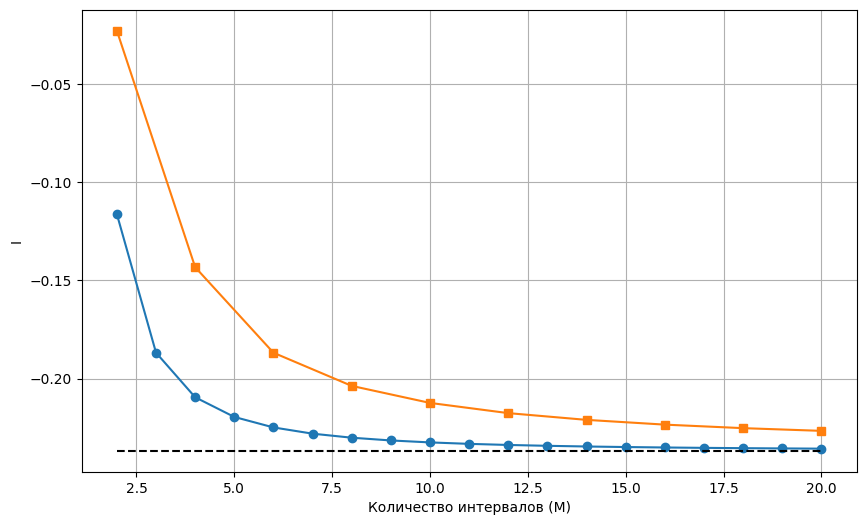

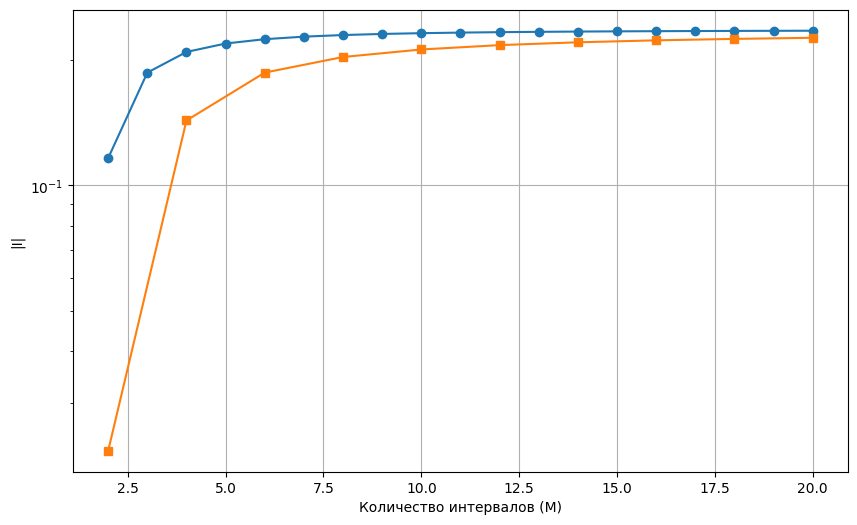

In [ ]:
Ms_trap = np.arange(2, 21)
Ms_simp = np.arange(2, 21, 2)

results_trap = [trapezoidal_4d(M) for M in Ms_trap]
results_simp = [simpson_4d(M) for M in Ms_simp]

plt.figure(figsize=(10, 6))
plt.plot(Ms_trap, results_trap, 'o-', label='Трапеции')
nn, = Ms_trap.shape
plt.plot(Ms_trap, [Ifunc]*nn, 'k--')
plt.plot(Ms_simp, results_simp, 's-', label='Симпсон')
print(results_simp[-1])
plt.xlabel('Количество интервалов (M)')
plt.ylabel('I')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.semilogy(Ms_trap, np.abs(results_trap), 'o-', label='Трапеции')
plt.semilogy(Ms_simp, np.abs(results_simp), 's-', label='Симпсон')
plt.xlabel('Количество интервалов (M)')
plt.ylabel('|I|')
plt.grid(True)

In [ ]:
Ms_trap.shape

(19,)

### 3. (не обязательно) Найдите интеграл $I$ сведением кратного интеграла к произведению одномерных и их вычислению с малой погрешностью.

# Указания.

В библиотеке `scipy` содержится функция для вычисления весов квадратурных формул
`scipy.integrate.newton_cotes`.
К сожалению, в настоящий момент (версия `scipy` 1.5.4) в этой функции содержатся ошибки.
Далее приводится альтернативная реализация вычисления весов, которую можно использоваться для вычисления весов метода Гаусса.

Согласно [формулам Ньютона-Котеса](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas),
веса $w_k$ в квадратурной формуле:
$$
\int_a^b f(x)dx\approx \sum_{k=1}^N w_k f(x_k),
$$
равны интегралу по заданному промежутку от многочленов Лагранжа:
$$
w_k=\int_a^b l_k(x)dx,
$$
где $l_k$ суть многочлены степени $N-1$, удовлетворяющие условиям:
$$
l_k(x_j)=\begin{cases}1, & k=j,\\0, &k\neq j.\end{cases}
$$
Хотя для $l_k$ известна аналитическая формула (которую вы можете использовать для интегрирования,
например, используя пакет символьных вычислений [`sympy`](https://www.sympy.org/)):
$$
l_k(x)=\frac{\prod_{j\neq k}(x-x_j)}{\prod_{j\neq k}(x_k-x_j)},
$$
для практического счета гораздо удобнее воспользоваться переходом к мономиальному базису.
Пусть многочлены Лагранжа раскладываются по одночленам следующим образом:
$$
l_k(x)=\sum_{n=0}^{N-1}L_{k,n} x^n.
$$
В этом базисе интеграл считается тривиально:
$$
w_k
=\int_a^b l_k(x)dx
=\sum_{n=0}^{N-1}L_{k,n} \int_a^b x^n dx
=\sum_{n=0}^{N-1}L_{k,n} \frac{b^{n+1}-a^{n+1}}{n+1}.
$$
Таким образом, задача нахождения весов сводится к вычислению матрицы $L=(L_{k,n})_{kn}$.
Используя известные значения многочленов в узлах интегрирования, получаем систему на $L_{k,n}$:
$$
1=l_k(x_k)=\sum_{n=0}^{N-1}L_{k,n} x^n_k,\quad
0=l_k(x_j)=\sum_{n=0}^{N-1}L_{k,n} x^n_j.
$$
Или в матричном виде:
$$
I_N = L W,\quad W=(x^n_j)_{n,j}
$$
где $I_N$ -- единичная матрица, $W$ -- матрица [Вандермонда](https://en.wikipedia.org/wiki/Vandermonde_matrix).
Таким образом преобразование $L$ может быть найдено обращением матрицы $W$: $L=W^{-1}$.
Напомним, что матрица Вандермонда может быть плохо обусловлена, поэтому могут потребоваться дополнительные шаги для уточнения матрицы $L$, что однако не будем делать в нашей упрощенной реализации.


In [ ]:
def newton_cotes(xk, a=-1, b=1):
    """Возвращает вектор весов `wk` квадратурной формулы для интервала [`a`,`b`]
    с узлами интегрирования в точках `xk`."""
    xk=np.asarray(xk)
    N = np.arange(len(xk), dtype=np.float) # Массив степеней.
    W = xk[None,:]**N[:,None] # Матрица Вандермонда.
    L = np.linalg.inv(W) # Матрица перехода к базису из многочленов Лагранжа с узлами xk.
    N = N + 1 # Степени после интегрирования
    ix = (b**N-a**N)/N # Интегралы от одночленов.
    w = L@ix # Искомые веса.
    return w

# Протестируем функцию.
# Считаем веса для формулы прямоугольников:
print("Rectangle rule:", newton_cotes([0], a=0, b=1))
# Формула трапеций:
print("Trapezoidal rule:", newton_cotes([0, 1], a=0, b=1))
# Формула Симпсона:
print("Simpson rule:", newton_cotes([0, 0.5, 1], a=0, b=1)*6, "/6")
# Сумма коэффициентов дает 1.
import numpy.testing as npt
npt.assert_almost_equal(np.sum(newton_cotes(np.random.randn(7), a=0, b=1)), 1.)
# Точное значение интеграла на многочлене малой степени.
xk = np.random.rand(6)
a, b = -1, 2
def f(x):
    return 4*x**3-3*x**2+2*x-1
def antiderivative_f(x):
    return x**4-x**3+x**2-x
wk = newton_cotes(xk, a=a, b=b)
npt.assert_almost_equal( np.sum(wk*f(xk)), antiderivative_f(b)-antiderivative_f(a) )